b) the probability that a student will obtain a perfect score while answering randomly is: 0.0031712119389339932
c) the probability that a student will score 9 or less while answering randomly is: 0.003942141664083465
d) the expected standard deviation is: 1.9364916731037085
e) the standard deviation is 1.0 at n=4 questions


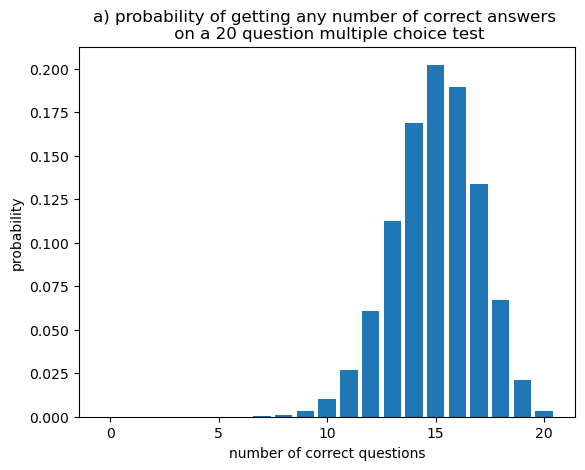

In [98]:
import numpy as np 
import math 
import matplotlib.pyplot as plt

## A2 Q1: Probability in Multiple Choice 
## Abigail deGroot 
## 21012489


correct = [] 
for n in range(0,21): 
    correct.append(n)   #index for probability 



def binomial(): #probability follows a poisson distribution 
    prob = []
    for i in range(21): 
        p = ((math.factorial(20))/(math.factorial(i)*math.factorial(20-i)))*(0.75**i)*(0.25**(20-i))
        prob.append(p)
        
    return prob

fail = 0       
epm = []
for i in range(10):         #sums the probabilities for all scores 9 or less
    fail += binomial()[i]

fail


"""
known standard deviation for a binomial is: 
sqrt(probability*number of trials *(1 - probability) )
"""

def stndDev():   #funtion for standard deviation 
    x = math.sqrt(0.75*20*(1-0.75)) 
    return x

def stndDev5050():   #funtion for standard deviation in 50/50 case
    x = math.sqrt(0.50*4*(1-0.50)) #I just used trial and error to get n=4
    return x



plt.title("a) probability of getting any number of correct answers \n on a 20 question multiple choice test")
plt.xlabel("number of correct questions")
plt.ylabel("probability")
plt.bar(correct, binomial(),)
plt.show
print("b) the probability that a student will obtain a perfect score while answering randomly is: " + str(binomial()[len(binomial())-1]))
print("c) the probability that a student will score 9 or less while answering randomly is: " + str(fail))
print("d) the expected standard deviation is: " + str(stndDev()))
print("e) the standard deviation is 1.0 at n=4 questions")


<function matplotlib.pyplot.show(close=None, block=None)>

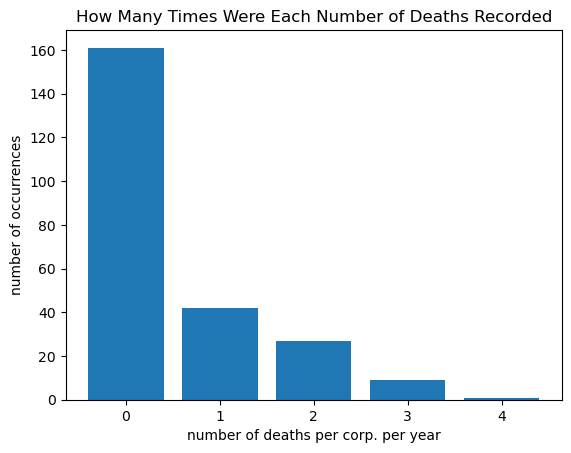

In [8]:
import numpy as np 
import math 
import matplotlib.pyplot as plt
import pandas as pd

## A2 Q2: Horsies  
## Abigail deGroot 
## 21012489

data = pd.read_csv('Horse_deaths.csv')  #filled blanks with zeroes using crtl + h in excel 

d = data.to_numpy() #converts panda thing to an array  

## a) * * * * * * * * * * * *

def mean_year(): 
    """
    computes the mean of number of horse kicks per year for each corp 
    mean = Total for each corp divided by the number of years (20)
    """
    m = [] 
    total = d[21]     #row containing total for each corp over all years 
    for i in range(1,len(total)-1):  #last and first values are the label and a total over all corps and all years
        x = int(total[i])/20
        m.append(x)
    return m

def mean_tot(): 
    """
    mean for all deaths over all years 
    """
    t = sum(mean_year())/ len(mean_year())
    return t 
    

def stdDev(): 
    """
    computes the standard deviation for the number of horse kicks per year for each corp 
    std. dev. = sqrt((sum (individual average - value) squared ) over one less than the number of values)
    """
    s = sum(mean_year())
    for i in range(0,len(mean_year())):
        mean_year()[i] = (mean_year()[i] - s)**2 
    sp = math.sqrt(sum(mean_year())/(len(mean_year())-1))
    return sp

## for a Poisson distribution, the mean is expected to be the average number of occuranves in an interval
## and the standard deviation is expected to be the square root of the mean

def pois_comp(): 
    """
    compares the expected mean and standard deviation for a poisson distribution
    to the calculated general ones 
    """
    pmean = mean_tot()
    pdev = math.sqrt(pmean)
    error = 0.05   #allowance for discrepancy because of sig. figs. 
    if pdev >= stdDev() - error and pdev <= stdDev() + error : # checking within some range
        return "this matches what is expected for a Poisson distribution within the given error"
    else: 
        return "this does not match what is expeted for a Poisson distribution"

pois_comp() #you can't run it because it is a ss but it says it matches within 0.05 

## b) * * * * * * * * * * * * * * 

x = d[1:21] # d without the headings and subheadings
ind = list(range(5))

def org(): 
    """
    organizing the data from d so it all goes in a nice list
    """
    pretty = []
    for i in range(0,len(x)): 
        pretty += list(x[i][1:13])
    return pretty 

def hist(): 
    """
    making a list to plot
    count number of occurrences (how many died per corp. in each year)
    """
    index = [0,0,0,0,0]
    for i in range(len(org())):
        n = int(org()[i])
        index[n] += 1
    return index


plt.bar(ind, hist())  
plt.title("How Many Times Were Each Number of Deaths Recorded")
plt.xlabel("number of deaths per corp. per year")
plt.ylabel("number of occurrences")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

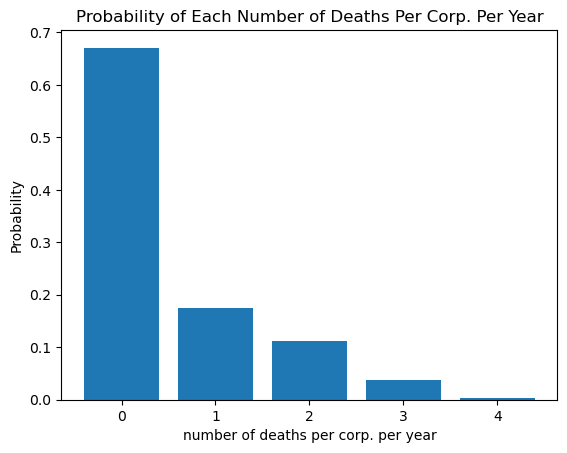

In [30]:

## c) * * * * * * * * * * * * * * 

total = sum(hist())

def prob(): 
    new = []
    for i in range (len(hist())): 
        new.append(hist()[i] / total)
    return new

plt.bar(ind, prob())  
plt.title("Probability of Each Number of Deaths Per Corp. Per Year")
plt.xlabel("number of deaths per corp. per year")
plt.ylabel("Probability")
plt.show

[0, 1, 2, 3, 4]


<function matplotlib.pyplot.show(close=None, block=None)>

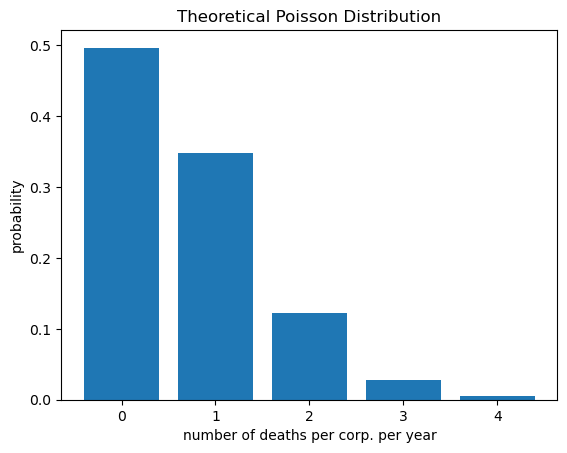

In [32]:

## c) contd.  * * * * * * * * * * * * * * 

def poisson():
    l = [] 
    for i in range(5): 
        l.append(math.e**(-mean_tot())*(mean_tot()**i)/math.factorial(i))
    return l 
print (ind)

plt.bar(ind, poisson())  
plt.title("Theoretical Poisson Distribution")
plt.xlabel("number of deaths per corp. per year")
plt.ylabel("probability")
plt.show

## The theoretical distribution assumes that there is a much more even distribution across
## all each of the possible outcomes, the real probability is much more in favour of 0 deaths across
## all categories